## Student Name: Uday Kumar Reddy Avula
## Student Email: Uday.kumar.reddy.avula-1@ou.edu

# Project 3: The Smart City Slicker

Imagine you are a stakeholder in a rising Smart City and want to know more about themes and concepts about existing smart cities. You also want to know where does your smart city place among others. In this project, you will perform 
exploratory data analysis, often shortened to EDA, to examine a data from the [2015 Smart City Challenge](https://www.transportation.gov/smartcity) to find facts about the data and communicating those facts through text analysis and visualizations.

In order to explore the data and visualize it, some modifications might need to be made to the data along the way. This is often referred to as data preprocessing or cleaning.
Though data preprocessing is technically different from EDA, EDA often exposes problems with the data that need to be fixed in order to continue exploring.
Because of this tight coupling, you have to clean the data as necessary to help understand the data.

In this project, you will apply your knowledge about data cleaning, machine learning, visualizations, and databases to explore smart city applications.

**Part 1** of the notebook will explore and clean the data. \
**Part 2** will take the results of the preprocessed data to create models and visualizations.

Empty cells are code cells. 
Cells denoted with [Your Answer Here] are markdown cells.
Edit and add as many cells as needed.

Output file for this notebook is shown as a table for display purposes. Note: The city name can be Norman, OK or OK Norman.

| city | raw text | clean text | clusterid | topicids | summary | keywords|
| -- | -- | -- | -- | -- | -- | -- |
|Norman, OK | Test, test , and testing. | test test test | 0 | T1, T2| test | test |

## Introduction
The Dataset: 2015 Smart City Challenge Applicants (non-finalist).
In this project you will use the applicant's PDFs as a dataset.
The dataset is from the U.S Department of Transportation Smart City Challenge.

On the website page for the data, you can find some basic information about the challenge. This is an interesting dataset. Think of the questions that you might be able to answer! A few could be:

1. Can I identify frequently occurring words that could be removed during data preprocessing?
2. Where are the applicants from?
3. Are there multiple entries for the same city in different applicantions?
4. What are the major themes and concepts from the smart city applicants?

Let's load the data!

## Loading and Handling files

Load data from `smartcity/`. 

To extract the data from the pdf files, use the [pypdf.pdf.PdfFileReader](https://pypdf.readthedocs.io/en/stable/index.html) class.
It will allow you to extract pages and pdf files and add them to a data structure (dataframe, list, dictionary, etc).
To install the module, use the command `pipenv install pypdf`.
You only need to handle PDF files, handling docx is not necessary.

In [2]:
import glob
f_list=[]
for file in glob.glob("smartcity/*.pdf"):
    f_list.append(file)
print(f_list) 

# ref:https://stackoverflow.com/questions/33998802/get-list-of-pdf-files-in-folder
# ref:https://www.geeksforgeeks.org/how-to-create-an-empty-dataframe-and-append-rows-columns-to-it-in-pandas/
# ref :https://stackoverflow.com/questions/34837707/how-to-extract-text-from-a-pdf-file
# ref : code from project 0

['smartcity/GA Brookhaven.pdf', 'smartcity/NY Buffalo.pdf', 'smartcity/CA Riverside.pdf', 'smartcity/AZ Scottsdale AZ.pdf', 'smartcity/FL Jacksonville.pdf', 'smartcity/LA New Orleans.pdf', 'smartcity/AL Montgomery.pdf', 'smartcity/MI Port Huron and Marysville.pdf', 'smartcity/WA Seattle.pdf', 'smartcity/LA Shreveport.pdf', 'smartcity/WA Spokane.pdf', 'smartcity/IN Indianapolis.pdf', 'smartcity/AL Birmingham.pdf', 'smartcity/LA Baton Rouge.pdf', 'smartcity/FL Miami.pdf', 'smartcity/CA Oceanside.pdf', 'smartcity/CA San Jose_0.pdf', 'smartcity/NE Lincoln.pdf', 'smartcity/MA Boston.pdf', 'smartcity/CA Sacramento.pdf', 'smartcity/VA Richmond.pdf', 'smartcity/GA Atlanta.pdf', 'smartcity/NY Rochester.pdf', 'smartcity/TN Memphis.pdf', 'smartcity/NC Raleigh.pdf', 'smartcity/NY Albany Troy Schenectady Saratoga Springs.pdf', 'smartcity/OH Cleveland.pdf', 'smartcity/NC Charlotte.pdf', 'smartcity/CA Fresno copy.pdf', 'smartcity/NJ Jersey City.pdf', 'smartcity/CA Chula Vista.pdf', 'smartcity/CA Long

Create a data structure to add the city name and raw text. You can choose to split the city name from the file.

In [3]:
from pypdf import PdfReader
import pandas
d=pandas.DataFrame()
l_city=[]
l_txt=[]
for i in f_list:
        
    reader=PdfReader(i)
    fname=i
    key=fname[13:-4]
    txt=""
    l_city.append(key)
    for page in reader.pages:
        txt+=page.extract_text()
    l_txt.append(txt)
d['city']=l_city
d['txt']=l_txt   

In [4]:
d

,city,txt
0,Brookhaven,“Buford Highway through DeKalb County is the m...
1,Buffalo,\n \nU.S. Department of Transportation \nNot...
2,Riverside,CITY OF RIVERSIDE\nCALIFORNIA\nApplication For...
3,Scottsdale AZ,\n \n \n \n \nFederal Agency Name: U.S. D...
4,Jacksonville,Beyond Traffic: The Smart City Challenge \nCon...
...,...,...
60,Tampa,\nBeyond Traffic: The Smart Tampa Vision | i ...
61,Norfolk,"City of Norfolk, VA\n*\nResponse Proposal to U..."
62,Orlando,BEYOND TRAFFIC: THE SMART CITY CHALLENGE - VIS...
63,Virginia Beach,\n1. Project Vision .........................


## Cleaning Up PDFs

One of the more frustrating aspects of PDF is loading the data into a readable format. The first order of business will be to preprocess the data. To start, you can use code provided by Text Analytics with Python, [Chapter 3](https://github.com/dipanjanS/text-analytics-with-python/blob/master/New-Second-Edition/Ch03%20-%20Processing%20and%20Understanding%20Text/Ch03a%20-%20Text%20Wrangling.ipynb): [contractions.py](https://github.com/dipanjanS/text-analytics-with-python/blob/master/New-Second-Edition/Ch05%20-%20Text%20Classification/contractions.py) (Pages 136-137), and [text_normalizer.py](https://github.com/dipanjanS/text-analytics-with-python/blob/master/New-Second-Edition/Ch05%20-%20Text%20Classification/text_normalizer.py) (Pages 155-156). Feel free to download the scripts or add the code directly to the notebook (please note this code is performed on dataframes).

In addition to the data cleaning provided by the textbook, you will need to:
1. Consider removing terms that may effect clustering and topic modeling. Words to consider are cities, states, common words (smart, city, page, etc.). Keep in mind n-gram combinations are important; this can also be revisited later depending on your model's performance.
2. Check the data to remove applicants that text was not processed correctly. Do not remove more than 15 cities from the data.


In [5]:
import re
import nltk
import spacy

# cleaning the text
#removing special charcters and words like smart, city, page.
format = r'[,;0-9)#@*.\"\':(\t\n]' 
format1 = r'\[\]'
d['text_cleaned']=d['txt'].str.lower()
d['text_cleaned'] = d['text_cleaned'].replace(format,' ',regex=True)
d['text_cleaned'] = d['text_cleaned'].replace(format1,' ',regex=True)
d['text_cleaned']=d['text_cleaned'].replace("[Cc]ity"," ",regex=True)
d['text_cleaned']=d['text_cleaned'].replace("smart"," ",regex=True)
d['text_cleaned']=d['text_cleaned'].replace("page"," ",regex=True)

 # https://github.com/dipanjanS/text-analytics-with-python/blob/master/New-Second-Edition/Ch05%20-%20Text%20Classification/text_normalizer.py
# https://www.analyticsvidhya.com/blog/2021/08/a-friendly-guide-to-nlp-text-pre-processing-with-python-example/

In [6]:
nlp=spacy.load('en_core_web_sm')

def lemm_text(txt):
    txt = nlp(txt)
    txt = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in txt])
    return txt



In [7]:
def stemming(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text


In [8]:
from nltk.tokenize.toktok import ToktokTokenizer
nltk.download('stopwords')
stop_words=nltk.corpus.stopwords.words('english')
t = ToktokTokenizer()
def delete_stopwords(text, is_lower_case=False):
    tokens = t.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stop_words]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/udayreddy544/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Add the cleaned text to the structure you created.


In [9]:
d['text_cleaned']=d['text_cleaned'].apply(lambda s:lemm_text(s))
d['text_cleaned']=d['text_cleaned'].apply(lambda s:stemming(s))
d['text_cleaned']=d['text_cleaned'].apply(lambda s:delete_stopwords(s))

In [10]:
d['txt']

0     “Buford Highway through DeKalb County is the m...
1      \n  \nU.S. Department of Transportation \nNot...
2     CITY OF RIVERSIDE\nCALIFORNIA\nApplication For...
3       \n  \n \n \n \nFederal Agency Name:   U.S. D...
4     Beyond Traffic: The Smart City Challenge \nCon...
                            ...                        
60     \nBeyond Traffic: The Smart Tampa Vision | i ...
61    City of Norfolk, VA\n*\nResponse Proposal to U...
62    BEYOND TRAFFIC: THE SMART CITY CHALLENGE - VIS...
63      \n1.  Project Vision  .........................
64    1 of 27 \n Executive summary : Creating a Vibr...
Name: txt, Length: 65, dtype: object

### Clean Up: Discussion
Answer the questions below.

#### Which Smart City applicants did you remove? What issues did you see with the documents?

[I have seen the cities applicants like Reno, Toledo, Tallahassee and lubbock as the data is not populating in the data frame, I think that PDFReader is not able to extract data from it, so I removed the four pdf from the smartcity folder.I have also removed the files Columbus and Albuquerque as this files are docx files, we are not considering for the analysis purpose.I have also removed the DC_0 pdf as the we don't know the city name for the pdf. 

#### Explain what additional text processing methods you used and why.

I have used the text processing techniques like removing the words like smart,city and page and also removed the special characters and digits as they are significant in the text processing.I also removed the stopwords using nltk toktok tokenizer and performed the techinques like the lemmatization ans stemming to make the data more useful for the clustering. 

#### Did you identify any potientally problematic words?

I encountered some subscripts and super scripts that are not being processed.I think that they will not effect our model as they are in very less number.

## Experimenting with Clustering Models

Now, you'll start to explore models to find the optimal clustering model. In this section, you'll explore [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [Hierarchical](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html), and [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN) clustering algorithms.
Create these algorithms with k_clusters for K-means and Hierarchical.
For each cell in the table provide the [Silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score), [Calinski and Harabasz score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html#sklearn.metrics.calinski_harabasz_score), and [Davies-Bouldin score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score).

In each cell, create an array to store the values.
For example, 

|Algorithm| k = 9 | k = 18| k = 36 | Optimal k| 
|--|--|--|--|--|
|K-means| [0.008,1.55,0.84]| [-0.015,1.56.,0.818] | [0.02,1.82,0.73] | [0.055,1.86,0.71] |
|Hierarchical |[0.02,1.81,0.988]| [0.04,1.75,0.94]| [0.06,1.92,0.70] | [0.047,1.7794,0.747]|
|DBSCAN | X | X | X | [0.003,1.75,1.02] |



### Optimality 
You will need to find the optimal k for K-means and Hierarchical algorithms.
Find the optimality for k in the range 2 to 50.
Provide the code used to generate the optimal k and provide justification for your approach.


|Algorithm| k = 9 | k = 18| k = 36 | Optimal k| 
|--|--|--|--|--|
|K-means|--|--|--|--|
|Hierarchical |--|--|--|--|
|DBSCAN | X | X | X | -- |



In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


def Algo_KMeans(k):
    
    Count_vec=CountVectorizer(ngram_range=(3,5))
    score={}


    train=Count_vec.fit_transform(d['text_cleaned'])
    K_means_9=KMeans(n_clusters=k).fit(train.toarray())
    label_9=K_means_9.predict(train)

    s=metrics.silhouette_score(train,K_means_9.predict(train),metric='euclidean')
    ch=metrics.calinski_harabasz_score(train.toarray(),label_9)
    db=metrics.davies_bouldin_score(train.toarray(),label_9)
    
    score['silhouette'] = s
    score['calinski'] = ch
    score['davies'] = db
    
    return score
def Algo_Dbscan():
    Count_vec=CountVectorizer(ngram_range=(3,5))
    score={}


    train=Count_vec.fit_transform(d['text_cleaned'])
    Dbscan_model=DBSCAN(eps=1,min_samples=2).fit(train)
    label_9=Dbscan_model.labels_
    #label_9=Dbscan_model.fit_predict(train.toarray())
    s=metrics.silhouette_score(train.toarray(),label_9)
    ch=metrics.calinski_harabasz_score(train.toarray(),label_9)
    db=metrics.davies_bouldin_score(train.toarray(),label_9)
    
    score['silhouette'] = s
    score['calinski'] = ch
    score['davies'] = db
    
    return score
    
def Algo_Hiec(k):
    Count_vec=CountVectorizer(ngram_range=(3,5))
    score={}


    train=Count_vec.fit_transform(d['text_cleaned'])
    Hiec_model= AgglomerativeClustering(n_clusters=k)

    Hiec_model.fit(train.toarray())
    label_9=Hiec_model.labels_

    s=metrics.silhouette_score(train.toarray(),label_9,metric='euclidean')
    ch=metrics.calinski_harabasz_score(train.toarray(),label_9)
    db=metrics.davies_bouldin_score(train.toarray(),label_9)
    
    score['silhouette']= s
    score['calinski']= ch
    score['davies'] = db
    
    return score

In [18]:
KM_s_9=Algo_KMeans(9)
KM_s_18=Algo_KMeans(18)
KM_s_36=Algo_KMeans(36)

/home/udayreddy544/.local/share/virtualenvs/cs5293sp23-project3-K6s67vO_/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/udayreddy544/.local/share/virtualenvs/cs5293sp23-project3-K6s67vO_/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/udayreddy544/.local/share/virtualenvs/cs5293sp23-project3-K6s67vO_/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
KM_s_9



{'silhouette': 0.008297410828453257,
 'calinski': 1.5575944624057616,
 'davies': 0.8488404684581243}

In [20]:
KM_s_18

{'silhouette': -0.015553039950539433,
 'calinski': 1.567409157828873,
 'davies': 0.8188870708861284}

In [21]:
KM_s_36

{'silhouette': 0.02464547238020372,
 'calinski': 1.820804055983294,
 'davies': 0.7339860839808273}

In [43]:
Algo_Dbscan()

{'silhouette': 0.0032310955430706234,
 'calinski': 1.7528956012946346,
 'davies': 1.0251419960330215}

In [45]:
H_9=Algo_Hiec(9)
H_9

{'silhouette': 0.024467072322700407,
 'calinski': 1.817843959573976,
 'davies': 0.9886026978885352}

In [46]:
H_18=Algo_Hiec(18)
H_18

{'silhouette': 0.04006929471787186,
 'calinski': 1.7577151390557717,
 'davies': 0.9466168464260792}

In [47]:
H_36=Algo_Hiec(36)
H_36

{'silhouette': 0.06188790943211213,
 'calinski': 1.9215158901858458,
 'davies': 0.7080652417194276}

/home/udayreddy544/.local/share/virtualenvs/cs5293sp23-project3-K6s67vO_/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/udayreddy544/.local/share/virtualenvs/cs5293sp23-project3-K6s67vO_/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/udayreddy544/.local/share/virtualenvs/cs5293sp23-project3-K6s67vO_/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/udayreddy544/.local/share/virtualenvs/cs5293sp23-project3-K6s67vO_/lib/python3.10/site-packages/sklearn/clust

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=49), k=(2, 50))

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

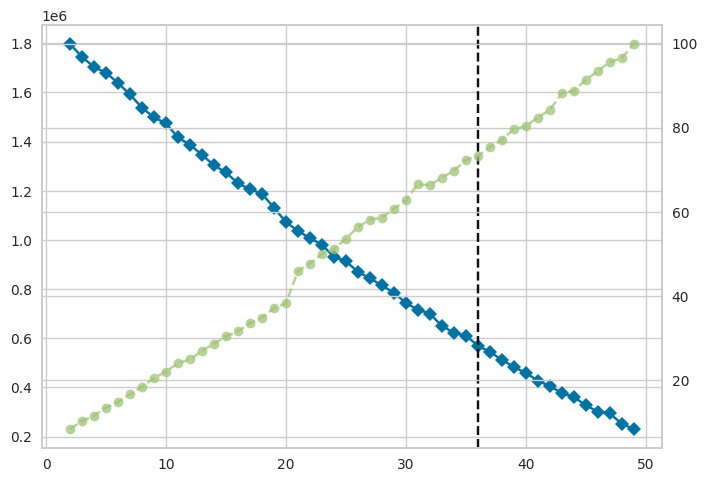

In [48]:
# finding optimal K using KElbowVisualizer
# referencd = https://towardsdatascience.com/elbow-method-is-not-sufficient-to-find-best-k-in-k-means-clustering-fc820da0631d
from yellowbrick.cluster import KElbowVisualizer

Count_vec=CountVectorizer(ngram_range=(3,5))
train=Count_vec.fit_transform(d['text_cleaned'])
K_means_9=KMeans()
plt=KElbowVisualizer(K_means_9,k=(2,50))
plt.fit(train.toarray())

Through the graph the optimal k is at 37

In [50]:
km_means_37=Algo_KMeans(37)

/home/udayreddy544/.local/share/virtualenvs/cs5293sp23-project3-K6s67vO_/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [51]:
km_means_37

{'silhouette': 0.05577653184528119,
 'calinski': 1.8672885858729682,
 'davies': 0.7184745197770444}

KElbowVisualizer(ax=<Axes: >, estimator=AgglomerativeClustering(n_clusters=49),
                 k=(2, 50))

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

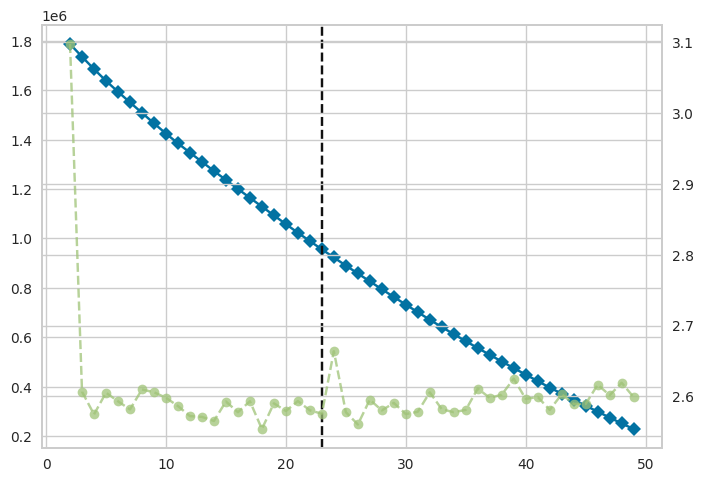

In [49]:
from yellowbrick.cluster import KElbowVisualizer

Count_vec=CountVectorizer(ngram_range=(3,5))
train=Count_vec.fit_transform(d['text_cleaned'])
heic=AgglomerativeClustering()
plt=KElbowVisualizer(heic,k=(2,50))
plt.fit(train.toarray())

Hierachal optimak k =23

In [52]:
hiec_K_23 = Algo_Hiec(23)
hiec_K_23

{'silhouette': 0.047747510101242195,
 'calinski': 1.7794056008896053,
 'davies': 0.7474926930430117}

#### How did you approach finding the optimal k?

I used the KElbowvisualizer function from the yellowbrick cluster,This function automatically plots the elbow graph and draws a dashed line at the elbow that generally denotes the optimal k.I plotted this graph for both the Hierachal clustering and K means , I got elbows at k=37 for K means and a elbow at k=23 for hierachal clustering  

#### What algorithm do you believe is the best? Why?

I believe that the Kmeans clusreting with k =37 is better than k=27 for hierachal clustering, because for the value of k=37, we good silouhtte score when compare to k=23 hierarchal clustering .The more the siloutte score the more the point is close to the cluster, so I choosed the algorithm k means with k=37.

### Add Cluster ID to output file
In your data structure, add the cluster id for each smart city respectively. Show the to append the clusterid code below.

In [12]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
Count_vec=CountVectorizer(ngram_range=(3,5))
train=Count_vec.fit_transform(d['text_cleaned'])
K_means=KMeans(n_clusters=37).fit(train)
label_km=K_means.predict(train)
label_km

/home/udayreddy544/.local/share/virtualenvs/cs5293sp23-project3-K6s67vO_/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([ 4,  3, 13,  1, 28, 32,  1,  1,  1,  1,  1,  1,  1,  5, 20,  1,  1,
        1,  1,  1, 11,  1, 16,  0, 29, 23, 35,  1, 26,  1, 31,  1, 21, 22,
       27,  1,  1,  1,  1, 14, 10, 25, 15, 26, 36, 18, 33,  1, 30,  2,  9,
       34, 19, 12,  1,  7,  6,  1,  8,  1, 17,  1, 24,  1,  1],
      dtype=int32)

In [13]:
d['cluster ID']=label_km
d

,city,txt,text_cleaned,cluster ID
0,Brookhaven,“Buford Highway through DeKalb County is the m...,""" buford highway dekalb counti danger stretch ...",4
1,Buffalo,\n \nU.S. Department of Transportation \nNot...,u depart transport notic fund opportun number ...,3
2,Riverside,CITY OF RIVERSIDE\nCALIFORNIA\nApplication For...,riversid california applic us depart transport...,13
3,Scottsdale AZ,\n \n \n \n \nFederal Agency Name: U.S. D...,feder agenc name u depart transport usdot fede...,1
4,Jacksonville,Beyond Traffic: The Smart City Challenge \nCon...,beyond traffic challeng connect jax – c jax er...,28
...,...,...,...,...
60,Tampa,\nBeyond Traffic: The Smart Tampa Vision | i ...,beyond traffic tampa vision &#124; beyond traf...,17
61,Norfolk,"City of Norfolk, VA\n*\nResponse Proposal to U...",norfolk va respons propos usdot beyond traffic...,1
62,Orlando,BEYOND TRAFFIC: THE SMART CITY CHALLENGE - VIS...,beyond traffic challeng - vision narr orlando ...,24
63,Virginia Beach,\n1. Project Vision .........................,project vision project demograph project align...,1


### Save Model

After finding the best model, it is desirable to have a way to persist the model for future use without having to retrain. Save the model using [model persistance](https://scikit-learn.org/stable/model_persistence.html). This model should be saved in the same directory as this notebook and should be loaded as the model for your `project3.py`.

Save the model as `model.pkl`. You do not have to use pickle, but be sure to save the persistance using one of the methods listed in the link.

In [69]:
K_means

KMeans(n_clusters=37)

In [23]:
from joblib import dump
import pickle
#pickle.dump(K_means,open(r'models_new.pkl','wb'),protocol=5)
dump(Count_vec,'vec.pkl')
dump(K_means,'model_km1.pkl',compress=1)



['model_km1.pkl']

## Derving Themes and Concepts

Perform Topic Modeling on the cleaned data. Provide the top five words for `TOPIC_NUM = Best_k` as defined in the section above. Feel free to reference [Chapter 6](https://github.com/dipanjanS/text-analytics-with-python/tree/master/New-Second-Edition/Ch06%20-%20Text%20Summarization%20and%20Topic%20Models) for more information on Topic Modeling and Summarization.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

topic_model=LatentDirichletAllocation(n_components=10,max_iter=50,learning_method='online',random_state=40)


### Extract themes
Write a theme for each topic (atleast a sentence each).

[Your Answer]

[Your Answer]

[Your Answer]

### Add Topid ID to output file
Add the top two topics for each smart city to the data structure.

## Gathering Applicant Summaries and Keywords

For each smart city applicant, gather a summary and keywords that are important to that document. You can use gensim to do this. Here are examples of functions that you could use.

```python

from gensim.summarization import summarize

def summary(text, ratio=0.2, word_count=250, split=False):
    return summarize(text, ratio= ratio, word_count=word_count, split=split)
    
from gensim.summarization import keywords

def keys(text, ratio=0.01):
    return keywords(text, ratio=ratio)
```

### Add Summaries and Keywords
Add summary and keywords to output file.

## Write output data

The output data should be written as a TSV file.
You can use `to_csv` method from Pandas for this if you are using a DataFrame.

`Syntax: df.to_csv('file.tsv', sep = '')` \
`df.to_csv('smartcity_eda.tsv', sep='\t')`

In [72]:
d.to_csv('smartcity_eda.tsv',sep='\t')

Error: need to escape, but no escapechar set

This gave error but i got the output in file

# Moving Forward
Now that you have explored the dataset, take the important features and functions to create your `project3.py`.
Please refer to the project spec for more guidance.
